


<div align="center">
  <h1>California Housing Price Prediction</h1>
</div>



In [ ]:
#%pip install pandas matplotlib seaborn scikit-learn

In [2]:
# importing pandas & loading dataset 
import pandas as p
df = p.read_csv('./datasets/housing.csv')

In [3]:
#head, tail, shapre & is null 
df.head() #Gives the first 5 rows
df.tail() #Gives the last 5 rows
df.shape #Gives the shape of the dataset (rows, columns) -> (20640,10)
df.isnull().sum() #Gives the count of null values present in each column


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# info() method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#describe table 
df.describe() # Run and see the output yourself because it's too big.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

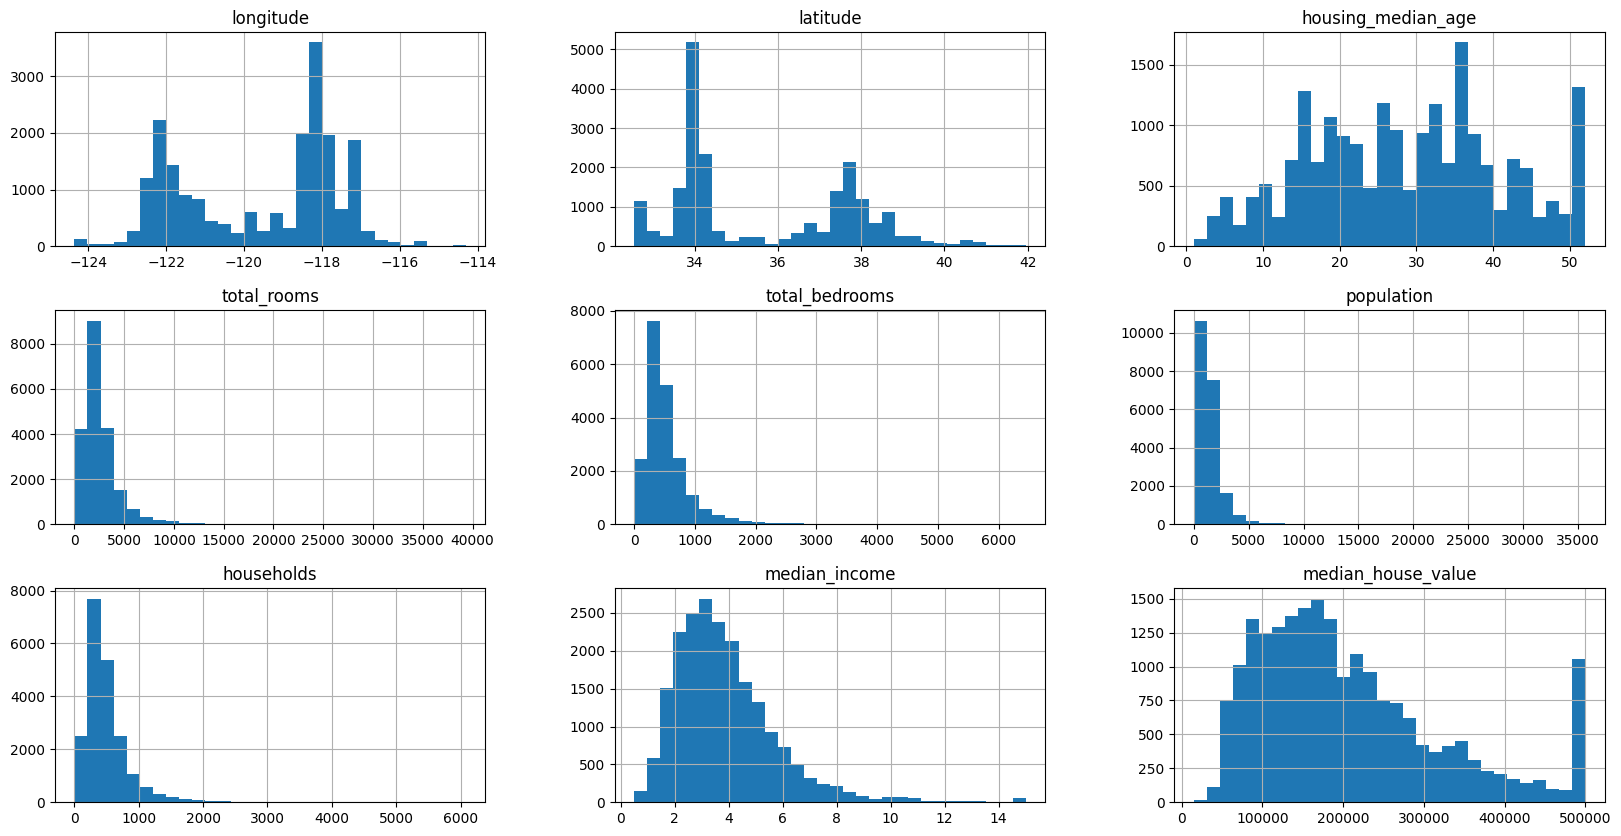

In [8]:
#matplotlib 
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(20, 10))

In [9]:
#Create a test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,
random_state=8)
train_set.shape, test_set.shape #((16512, 10), (4128, 10))

((16512, 10), (4128, 10))

In [10]:
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
df['median_income'].min(), df['median_income'].max()

(np.float64(0.4999), np.float64(15.0001))

In [12]:
import numpy as n
df['income_cat'] = p.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5,
6.0, n.inf], labels=[1, 2, 3, 4, 5])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [13]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2,
stratify=df['income_cat'], random_state=8)
strat_train_set['income_cat'].value_counts()

income_cat
3    5789
2    5265
4    2911
5    1890
1     657
Name: count, dtype: int64

In [14]:
strat_train_set.drop(columns='income_cat', inplace=True)
strat_test_set.drop(columns='income_cat', inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

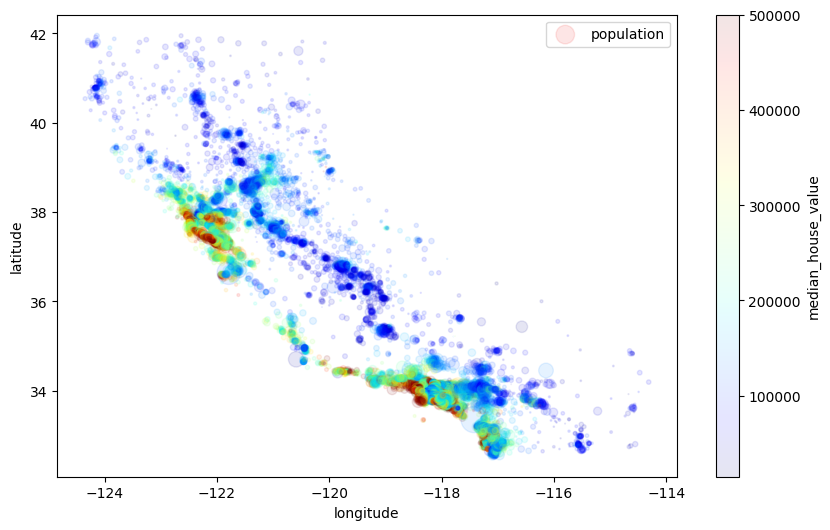

In [15]:
df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(10, 6),
    s=df['population']/100,
    label='population',
    alpha=0.1,
    c='median_house_value',
    cmap='jet',
    colorbar=True
)

In [16]:
housing = strat_train_set.drop(columns='median_house_value')
housing_label = strat_train_set['median_house_value'].copy()

In [17]:
#Clean and Preprocess the dataset
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        155
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [18]:
housing_num = housing.drop(columns='ocean_proximity')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('impute', SimpleImputer(strategy='median')),
('standarize', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.70903084, -0.73611778, -0.05246406, ...,  0.98070311,
         1.00253757, -0.19279129],
       [ 1.12365056, -0.68468381, -1.80430733, ...,  1.3601267 ,
         1.76722451, -0.12359366],
       [ 1.20357726, -0.97926016, -1.96356581, ...,  1.33251607,
         1.18574381, -0.06156895],
       ...,
       [ 0.60912247, -0.79690337, -0.21172254, ...,  0.87115123,
         0.77153839, -0.45386467],
       [-0.84953969,  1.16693897,  1.85863769, ..., -0.87188158,
        -0.7206632 , -0.88218324],
       [ 0.59413622, -0.74546941,  0.50494062, ...,  0.3367518 ,
         0.12367862, -0.8303905 ]], shape=(16512, 8))

In [19]:
from sklearn.preprocessing import OneHotEncoder
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
('num', num_pipeline, num_attributes),
('cat', OneHotEncoder(), cat_attributes)
])

In [20]:
housing_prepared = full_pipeline.fit_transform(housing)

In [21]:
#LinearRegression
import numpy as n
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_label)
some_data = housing.iloc[:5]
some_label = housing_label.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
some_prediction = lr.predict(some_prepared_data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = mean_squared_error(some_label, some_prediction)
n.sqrt(error) 

np.float64(44910.398106682565)

In [22]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared, housing_label)
dtr_prediction = dtr.predict(some_prepared_data)
dtr_error = mean_squared_error(some_label,dtr_prediction)
n.sqrt(dtr_error)

np.float64(0.0)

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, housing_prepared, housing_label,
scoring='neg_mean_squared_error', cv=10)
n.sqrt(-scores)

array([70922.71884063, 68671.48835752, 72795.71127847, 70114.16704051,
       67719.69235073, 68731.36417681, 69804.27909647, 65670.38087727,
       71873.38264064, 68405.81808379])

In [24]:
n.sqrt(-scores).mean()

np.float64(69470.90027428299)

In [26]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_prepared, housing_label)
rfr_scores = cross_val_score(rfr, housing_prepared, housing_label,
scoring='neg_mean_squared_error', cv=10)
n.sqrt(-rfr_scores), n.sqrt(-rfr_scores).mean()

(array([50145.31946603, 48936.7970592 , 48693.56278531, 51686.93587301,
        46659.45862779, 47798.87871596, 48407.31012292, 49647.69542591,
        50724.71953176, 48617.87286729]),
 np.float64(49131.8550475183))

In [ ]:
# dumping the model using joblib
import joblib
#joblib.dump(rfr, 'rfr_model.pkl')